In [1]:
import pandas as pd
from pandas import DataFrame
import requests
import os
import os.path
import datetime as dt
import json
import numpy as np
from datetime import timedelta, datetime
from dateutil import parser
import math
%matplotlib inline
from matplotlib import pyplot as plt

from dotenv import load_dotenv
load_dotenv()

import warnings
warnings.filterwarnings('ignore')

In /opt/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/envs/env1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [78]:
# Load environment variables 
binance_api_key = os.getenv("BINANCE_API_KEY")
binance_secret_key= os.getenv("BINANCE_SECRET_KEY")


In [79]:
type(binance_api_key)

str

In [80]:
type(binance_secret_key)

str

In [81]:
# Set up client 
from binance.client import Client
binance_client = Client(api_key=binance_api_key, api_secret=binance_secret_key)

# Constants
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750

# Create collecting new data function
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2015', '%d %b %Y')
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

# Create function to retreive tickers and timestamps
def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2015', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

In [82]:
symbols = ['LINKBTC', 'NANOBTC', 'XMRBTC', 'ZILBTC', 'NEOBTC', 'ADABTC', 'VETBTC', 'WTCBTC']


In [83]:
thelen = len(symbols)
thelen


8

In [84]:
price_data = []
for symbol in symbols:
    prices=get_all_binance(symbol, kline_size='1d')
    prices=prices.loc[:,['close']]
    price_data.append(prices.assign(coin=symbol))

coins = pd.concat(price_data)
coins

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


,close,coin
timestamp,,
2017-09-28,0.00005809,LINKBTC
2017-09-29,0.00007894,LINKBTC
2017-09-30,0.00010456,LINKBTC
2017-10-01,0.00009965,LINKBTC
2017-10-02,0.00008510,LINKBTC
2017-10-03,0.00008054,LINKBTC
2017-10-04,0.00009312,LINKBTC
2017-10-05,0.00009400,LINKBTC
2017-10-06,0.00010950,LINKBTC


In [85]:
coins = coins.pivot(columns='coin')

In [86]:
coins.head()

close                                                        
coin       ADABTC LINKBTC NANOBTC      NEOBTC VETBTC WTCBTC XMRBTC ZILBTC
timestamp                                                                
2017-07-14    NaN     NaN     NaN  0.00249900    NaN    NaN    NaN    NaN
2017-07-15    NaN     NaN     NaN  0.00251400    NaN    NaN    NaN    NaN
2017-07-16    NaN     NaN     NaN  0.00263800    NaN    NaN    NaN    NaN
2017-07-17    NaN     NaN     NaN  0.00266600    NaN    NaN    NaN    NaN
2017-07-18    NaN     NaN     NaN  0.00264300    NaN    NaN    NaN    NaN

In [87]:
coins = coins.dropna()
coins.head()

close                                                  \
coin            ADABTC     LINKBTC     NANOBTC      NEOBTC      VETBTC   
timestamp                                                                
2018-07-25  0.00002113  0.00003003  0.00029750  0.00417300  0.00000258   
2018-07-26  0.00002069  0.00003167  0.00027920  0.00416800  0.00000315   
2018-07-27  0.00002026  0.00003228  0.00027540  0.00408200  0.00000307   
2018-07-28  0.00001994  0.00003396  0.00026960  0.00412800  0.00000312   
2018-07-29  0.00001980  0.00004009  0.00026580  0.00406700  0.00000322   

                                                
coin            WTCBTC      XMRBTC      ZILBTC  
timestamp                                       
2018-07-25  0.00073210  0.01752800  0.00000942  
2018-07-26  0.00071500  0.01720000  0.00000923  
2018-07-27  0.00075650  0.01714300  0.00000911  
2018-07-28  0.00074460  0.01704800  0.00000890  
2018-07-29  0.00071170  0.01650200  0.00000879

In [88]:
coins=coins.apply(pd.to_numeric)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ab7be50>,
      dtype=object)

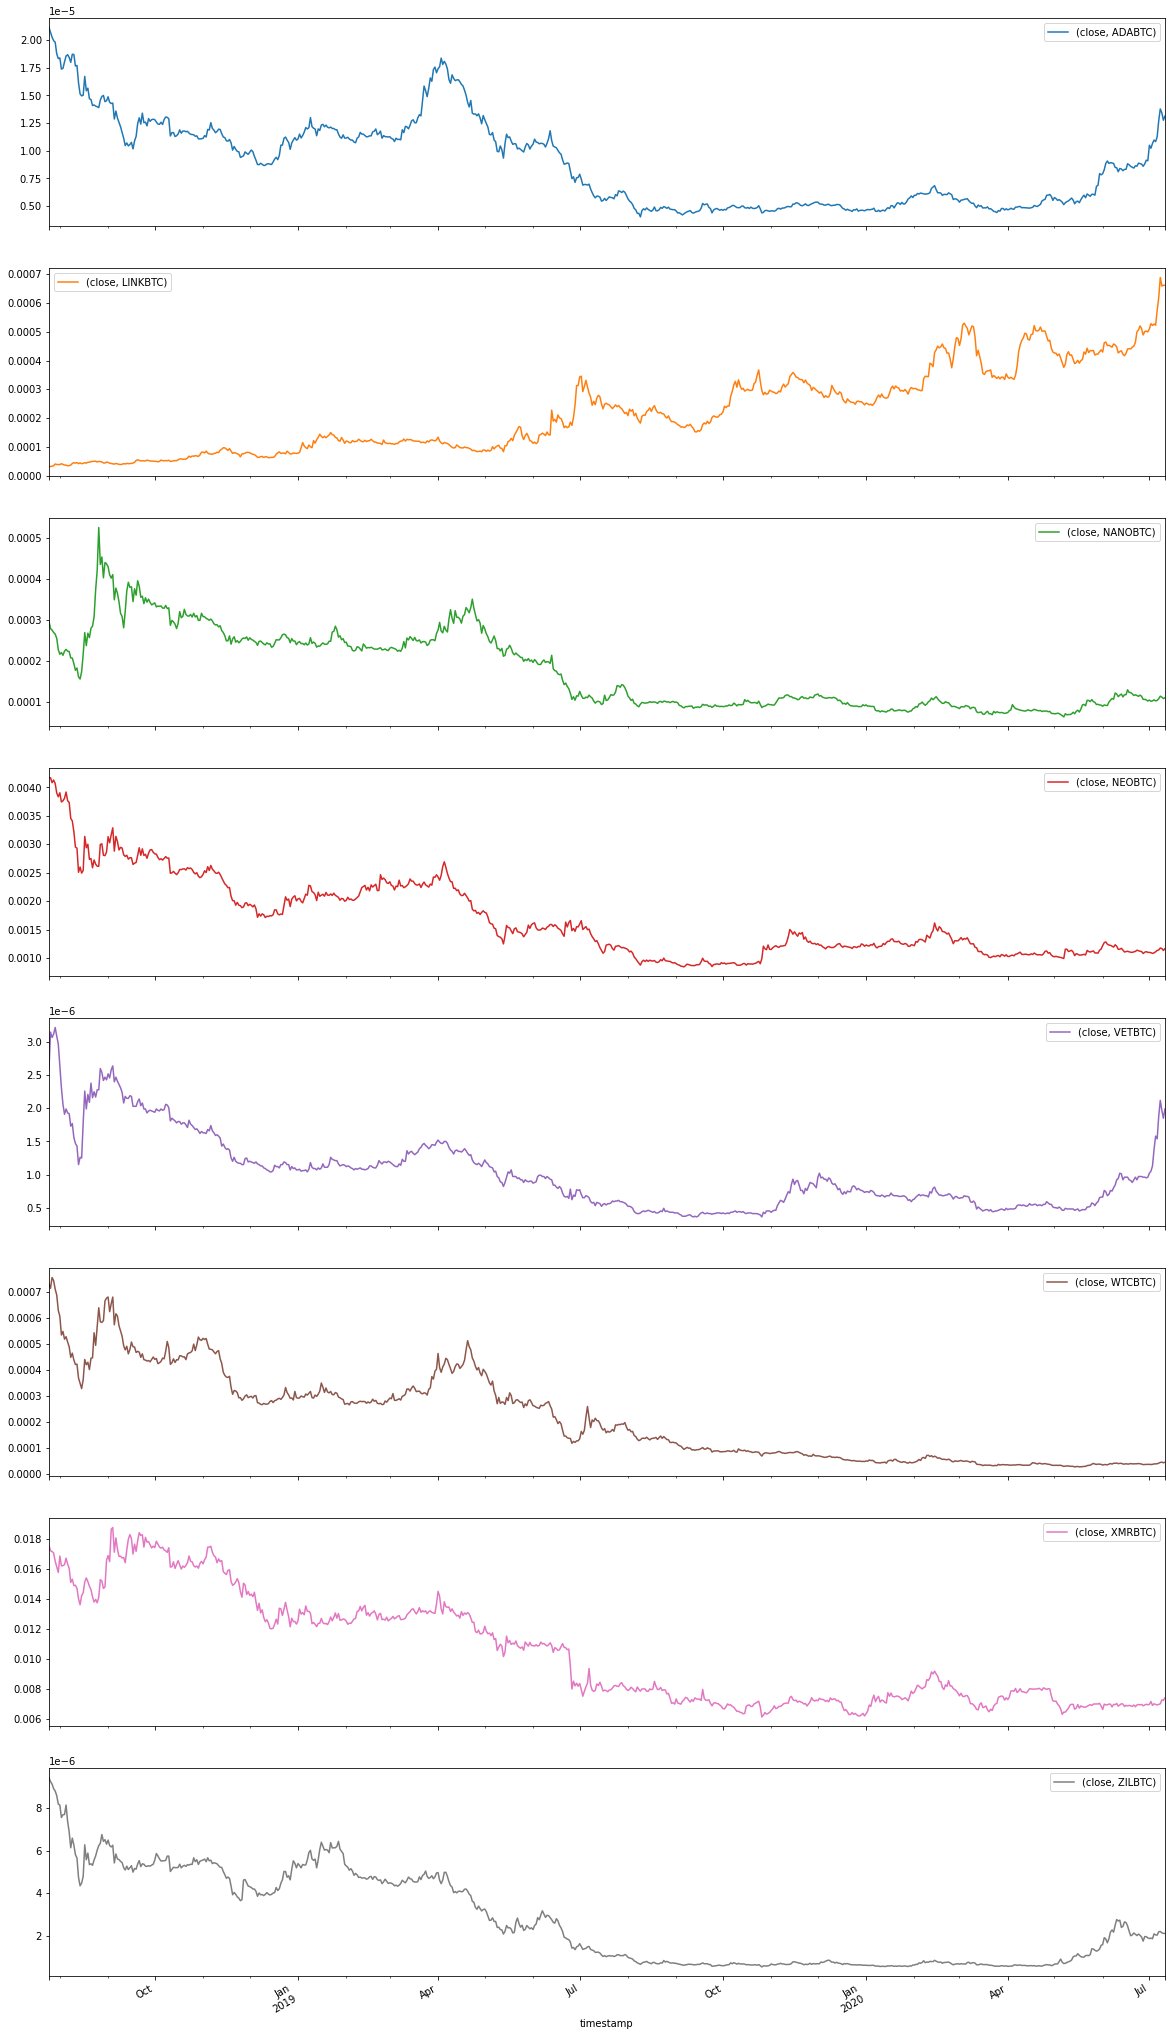

In [89]:
coins.plot(figsize=(20,40), subplots=True)

In [90]:
# Create a daily return dataframe
coins_dr = coins.pct_change()*100
coins_dr = coins_dr.dropna()
coins_dr.describe()

close                                                              \
coin       ADABTC     LINKBTC     NANOBTC      NEOBTC      VETBTC      WTCBTC   
count  717.000000  717.000000  717.000000  717.000000  717.000000  717.000000   
mean    -0.009014    0.592682   -0.030172   -0.118043    0.092020   -0.246090   
std      3.407177    5.875194    4.705541    3.506308    5.177017    5.391105   
min    -12.034161  -17.138083  -17.139053  -14.466053  -20.512821  -19.222462   
25%     -1.918977   -2.833616   -2.464332   -1.931716   -2.380952   -3.426193   
50%     -0.196850   -0.208277   -0.303644   -0.367309    0.000000   -0.367454   
75%      1.703578    3.152725    1.893764    1.302762    2.127660    2.187902   
max     15.429403   61.436888   24.780441   23.543307   42.400000   29.904875   

                               
coin       XMRBTC      ZILBTC  
count  717.000000  717.000000  
mean    -0.081655   -0.080350  
std      2.761856    5.111793  
min    -15.887359  -16.374269  
25%     -1.598441   -2.941176  
50%     -0.082614    0.000000  
75%      1.248352    1.953125  
max     13.031866   30.897704

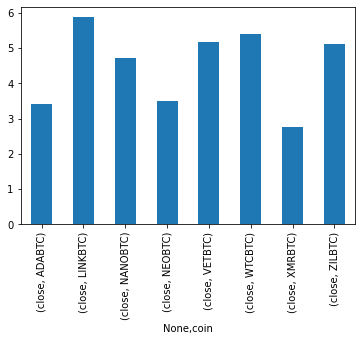

In [91]:
coins_dr.std().plot(kind= 'bar', rot=90)

### Most volatile coins: [LINK, WTC, VET]

In [18]:
# Get chainlink data
link_data=get_all_binance('LINKBTC', '1h')
link_data=link_data.loc[:,['close']]
link_data=link_data.rename(columns={'close':'LINK Close'})

All caught up..!


In [19]:
# Get waltonchain data
wtc_data=get_all_binance('WTCBTC', '1h')
wtc_data=wtc_data.loc[:,['close']]
wtc_data=wtc_data.rename(columns={'close':'WTC Close'})

All caught up..!


In [20]:
# Get vechain data
vet_data=get_all_binance('VETBTC', '1h')
vet_data=vet_data.loc[:,['close']]
vet_data=vet_data.rename(columns={'close':'VET Close'})

All caught up..!


In [21]:
link_data.to_csv('link_btc_1hr.csv')

In [22]:
wtc_data.to_csv('wtc_btc_1hr.csv')

In [23]:
vet_data.to_csv('vet_btc_1hr.csv')